In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# July 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [5]:
train_score = reg.score(X_train, y_train)
print(f'R2 score (train): {train_score:.4f}')

test_score = reg.score(X_test, y_test)
print(f'R2 score (test): {test_score:.4f}')

R2 score (train): 0.8049
R2 score (test): 0.7756


Grid Search

In [6]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': np.arange(50, 501, 50), 
    'learning_rate': np.arange(0.1, 1.01, 0.1),
    'max_depth': np.arange(3, 11),
    'subsample': np.arange(0.5, 1.01, 0.1),
    'max_features': ['sqrt', 'log2', None]
}
reg = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(reg, params, n_iter=50, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'subsample': 0.8999999999999999, 'n_estimators': 400, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.1}


In [7]:
print(f'R2 score (train): {random_search.score(X_train, y_train):.4f}')
print(f'R2 score (test): {random_search.score(X_test, y_test):.4f}')

R2 score (train): 0.9297
R2 score (test): 0.8447


Learning curve

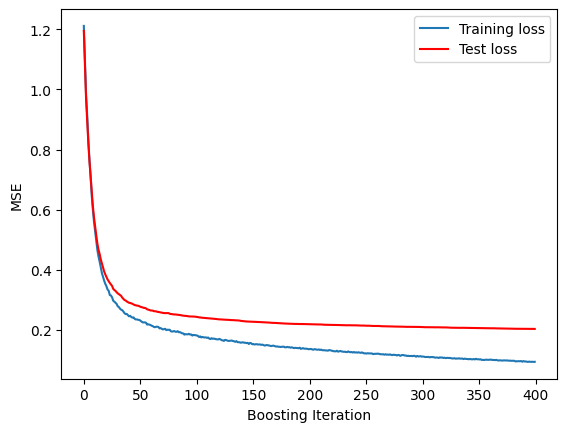

In [8]:
from sklearn.metrics import mean_squared_error as MSE

best_reg = random_search.best_estimator_
test_score = np.zeros(best_reg.n_estimators_)
for i, y_test_pred in enumerate(best_reg.staged_predict(X_test)):
    test_score[i] = MSE(y_test, y_test_pred)
    
plt.plot(np.arange(best_reg.n_estimators), best_reg.train_score_, label='Training loss')
plt.plot(np.arange(best_reg.n_estimators), test_score, 'r', label='Test loss')
plt.xlabel('Boosting Iteration')
plt.ylabel('MSE')
plt.legend()

plt.savefig('figures/gbdt_learning_curve.pdf', bbox_inches='tight')

Using Early Stopping

In [9]:
reg = GradientBoostingRegressor(n_estimators=1000, max_depth=5, subsample=0.9, 
                                max_features='log2', n_iter_no_change=20, random_state=42)
reg.fit(X_train, y_train)

print(f'R2 score (train): {reg.score(X_train, y_train):.4f}')
print(f'R2 score (test): {reg.score(X_test, y_test):.4f}')

R2 score (train): 0.9201
R2 score (test): 0.8370


In [10]:
print(f'Number of trees: {reg.n_estimators_}')

Number of trees: 384
